In [18]:
# # 1. use K-means clustering and Hierarchical clustering to cluster the country into groups. 
# please choose the number of the cluster in a rational reason


# get and prepare data

import pandas as pd
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('country.txt', delimiter=',')

data_witoutCountries = data.drop('country', axis=1)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_witoutCountries)

### K-Means ###

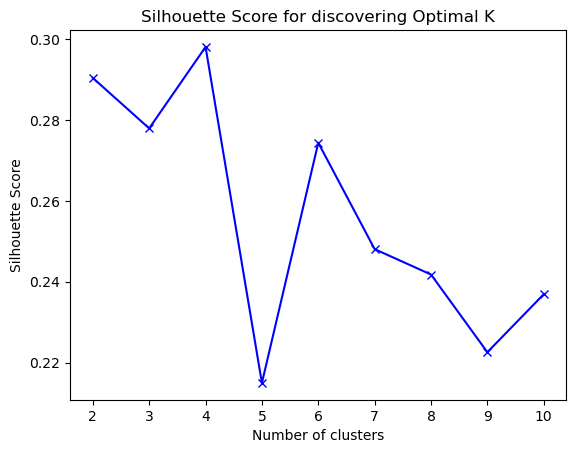

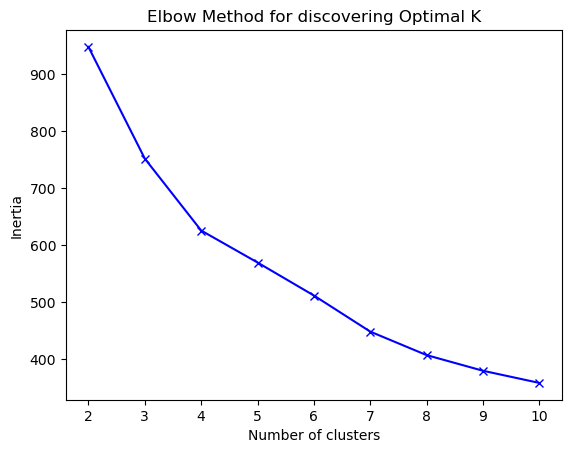

In [19]:
# use inertia and silhouette to evaluate how well a given number of clusters fits the data

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_)) 


# Silhouette Score
plt.figure()
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for discovering Optimal K')
plt.show()

# Elbow Method:
plt.figure()
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for discovering Optimal K')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)
kmeans_labels = kmeans.labels_
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

### Combining the results we can infer that 3 or 4 is a rational choice for clusters. Silouhette Score drops down significantly at 5,
# but has good values at 2, 3 and 4 and elbow method shows the biggest drop in ineratia going to three, then has a smaller drop going to 4.
# We will go with n = 3.

### Hierarchical Clustering ###

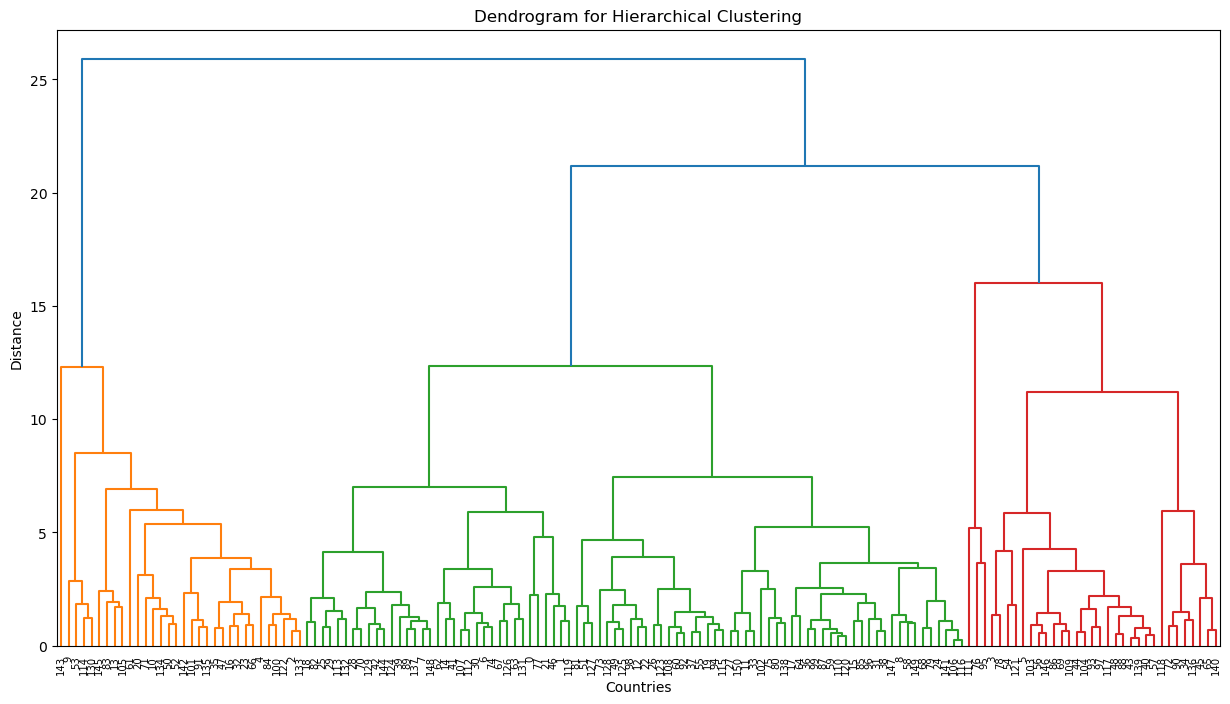

In [20]:
### Hiearchical Clustering:

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

hierclus = linkage(data_scaled, method='ward')

plt.figure(figsize=(15, 8))
dendrogram(hierclus)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Countries')
plt.xticks(fontsize = 7.25)
plt.ylabel('Distance') 
plt.show()

hierarchical_labels = fcluster(hierclus, t=3, criterion='maxclust')


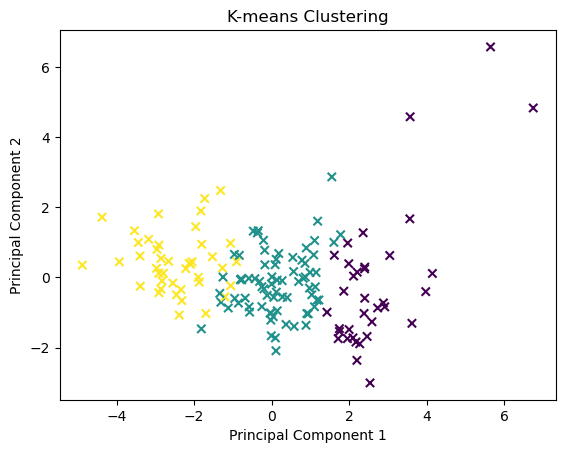

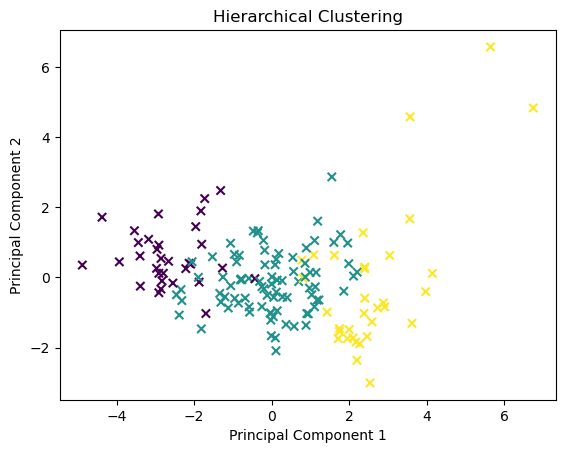

In [21]:
from sklearn.decomposition import PCA
import numpy as np

# 2. use PCA to reduce the dimension to 2d, and visualize the cluster from K-means and Hierarchical clustering respectively

pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

# K-means clustering:
plt.figure()
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, cmap='viridis', marker='x')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Hierarchical Clustering:
plt.figure()
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=hierarchical_labels, cmap='viridis', marker='x')
plt.title('Hierarchical Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# 3. please write the suggestion to CEO about the country you suggest #

In [22]:
data['KMeans_Cluster'] = kmeans.labels_

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

def find_representative_country(cluster_number):
    cluster_data = data[data['KMeans_Cluster'] == cluster_number]
    cluster_data_clean = cluster_data.drop(['country', 'KMeans_Cluster'], axis=1)
    distances = cdist(cluster_data_clean, [centroids[cluster_number]])
    representative_index = np.argmin(distances)
    return cluster_data.iloc[representative_index]['country']

for i in range(3):
    rep_country = find_representative_country(i)
    print(f"Representative country for K-means Cluster {i}: {rep_country}")

Representative country for K-means Cluster 0: Belgium
Representative country for K-means Cluster 1: Montenegro
Representative country for K-means Cluster 2: Sudan


In [23]:
data['KMeans_Cluster'] = kmeans.labels_

centroids = scaler.inverse_transform(kmeans.cluster_centers_)


def is_worst_high(column_name):
    return column_name in ['child_mort', 'inflation', 'total_fer']

def is_worst_low(column_name):
    return column_name in ['life_expec', 'income', 'gdpp', 'health', 'imports', 'exports']

def find_worst_country(cluster_number, column_name):
    cluster_data = data[data['KMeans_Cluster'] == cluster_number]
    
    if is_worst_high(column_name):
        idx = cluster_data[column_name].idxmax()
    elif is_worst_low(column_name):
        idx = cluster_data[column_name].idxmin()
    else:
        raise ValueError(f"Wrong value: {column_name}")
    
    worst_country = cluster_data.loc[idx]
    return worst_country['country'], worst_country[column_name]

clusters = data['KMeans_Cluster'].unique()
columns = data.columns.difference(['country', 'KMeans_Cluster'])

for cluster_number in clusters:
    print(f"\nAnalysis of Cluster {cluster_number}:\n")
    for column_name in columns:
        country, value = find_worst_country(cluster_number, column_name)
        print(f"Worst country from Cluster {cluster_number} based on {column_name}: {country} with value = {value}")
    
    print("\n\n")

data['KMeans_Cluster'] = kmeans_labels
data['Hierarchical_Cluster'] = hierarchical_labels

numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
kmeans_analysis = data.groupby('KMeans_Cluster')[numeric_columns].mean()
hierarchical_analysis = data.groupby('Hierarchical_Cluster')[numeric_columns].mean()

print("K-means Cluster Analysis:\n", kmeans_analysis)
print("Hierarchical Cluster Analysis:\n", hierarchical_analysis)



Analysis of Cluster 1:

Worst country from Cluster 1 based on child_mort: Myanmar with value = 64.4
Worst country from Cluster 1 based on exports: Myanmar with value = 0.109
Worst country from Cluster 1 based on gdpp: Nepal with value = 592
Worst country from Cluster 1 based on health: Myanmar with value = 1.97
Worst country from Cluster 1 based on imports: Myanmar with value = 0.0659
Worst country from Cluster 1 based on income: Nepal with value = 1990
Worst country from Cluster 1 based on inflation: Venezuela with value = 45.9
Worst country from Cluster 1 based on life_expec: Vanuatu with value = 63.0
Worst country from Cluster 1 based on total_fer: Samoa with value = 4.34




Analysis of Cluster 2:

Worst country from Cluster 2 based on child_mort: Haiti with value = 208.0
Worst country from Cluster 2 based on exports: Timor-Leste with value = 2.2
Worst country from Cluster 2 based on gdpp: Burundi with value = 231
Worst country from Cluster 2 based on health: Pakistan with value =

In [24]:
### 3. please write the suggestion to CEO about the country you suggest

# Dear CEO of the NGO, consider the following:
# The most benefit from investing money can be done where the countries are in most need,
# because in relation to the circumstances there, little money can have the biggest impact,
# same as giving 100$ to someone with 0$ networth has a bigger impact on their life compared
# to giving someone 100$ with 10.000$ networth has.


# I'd therefore recommend to completely skip the countries of the first two clusters (countries like Belgium and Montenegro),
# and fully focus on countries like Sudan, i. e. the third cluster.

# From the third cluster, which country should get money to what end? 
# In Haiti, I would spent a third of the money to fight child mortality and low life expactency.
# Invest in health care, health information campaigns and medical supplies there.

# Then I'd spend another third in Niger to figt high fertility. Increase education and
# retirement provision, to make having many children less needed and help focus ressources
# on fewer children. 

# Another third should go to Burundi, the country with the lowest GDDP to help
# increase economic growth, which would benefit society as a whole.

# In all, it should be checked if any influence on the given numbers can be seen
# after the investments, to track the success of the measures taken.

# This would be a wise way to spend money based on given data.